# Final models comparison and summary

### Dependencies loading

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pickle
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

# np.random.seed(1916) #uncomment if you want your code to be reproducible; for the purposes of our activity, let's add some randomness to the results

### Final models comparison

Now we have to use our 6 models to score our test set!

#### Naive Model

In case of Naive Model we have already scored our test set!

In [2]:
naive_model_score = pd.read_csv("../data/models_output/naive.csv", index_col = 0)

In [3]:
naive_model_score.rename(index={0: 'naive_model'},inplace=True)

In [4]:
naive_model_score

,RMSE,MAE
naive_model,0.16786,0.091059


#### OLS

In [5]:
df_train = pd.read_csv("../data/output/train_fe.csv", index_col=0)
df_test = pd.read_csv("../data/output/test_fe.csv", index_col=0)

In [6]:
X = ['adv_cat_(874.5, inf]', 'diff_positive', 'str_cat_(0.0875, 0.192]', 'ta_log', 'WB_GDPpc', 'txt_cat_(0.488, 24.415]', 'txt_cat_(-34.811, 0.488]', 'gielda_2', 'ppe_clip', 'revenue_cat_(1248.817, 4233.587]', 'revenue_cat_(4233.587, inf]', 'pi_cat_(8108.5, inf]', 'revenue_cat_(0.174, 1248.817]', 'roa_clip', 'pi_cat_(-8975.0, -1.523]', 'pi_cat_(157.119, 465.9]', 'pi_cat_(465.9, 7875.5]', 'pi_cat_(-1.523, 157.119]']

In [7]:
model = pickle.load(open("../models/ols.sav", 'rb'))

In [8]:
y_pred = model.predict(df_test.loc[:,X].values)

In [9]:
y_true = df_test.etr.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
ols_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

In [11]:
comp = pd.DataFrame([y_pred, y_true]).rename({0:"y_pred", 1:"y_true"}).T
plt.figure(figsize=(10, 5))
sns.jointplot(comp.y_pred, comp.y_true, kind="reg", truncate=False,)

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1000x500 with 0 Axes>

In [12]:
ols_model_score.rename(index={0: 'ols_model'},inplace=True)

In [13]:
ols_model_score

,RMSE,MAE
ols_model,0.085129,0.061867


#### ARMA

In case of ARMA we have already scored our test set!

In [14]:
arma_model_score = pd.read_csv("../data/models_output/arma.csv", index_col = 0)

In [15]:
arma_model_score.rename(index={0: 'arma_model'},inplace=True)

In [16]:
arma_model_score

,RMSE,MAE
arma_model,0.115057,0.073336


#### ARDL

In [17]:
df_train = pd.read_csv("../data/output/train_fe.csv", index_col=0)
df_test = pd.read_csv("../data/output/test_fe.csv", index_col=0)

In [18]:
X = ['sale', 'cfc', 'txt_cat_(-34.811, 0.488]', 'txt_cat_(0.488, 24.415]',
       'txt_cat_(308.55, 327.531]', 'pi_cat_(7875.5, 8108.5]',
       'str_cat_(0.28, inf]', 'dlc_cat_(176.129, 200.9]', 'diff_positive',
       'etr_y_ma']

In [19]:
model = pickle.load(open("../models/ardl.sav", 'rb'))

In [20]:
y_pred = model.predict(df_test.loc[:,X].values)

In [21]:
y_true = df_test.etr.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
ardl_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

In [22]:
comp = pd.DataFrame([y_pred, y_true]).rename({0:"y_pred", 1:"y_true"}).T
plt.figure(figsize=(10, 5))
sns.jointplot(comp.y_pred, comp.y_true, kind="reg", truncate=False,)

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1000x500 with 0 Axes>

In [23]:
ardl_model_score.rename(index={0: 'ardl_model'},inplace=True)

In [24]:
ardl_model_score

,RMSE,MAE
ardl_model,0.082121,0.05862


#### KNN

In [25]:
df_train = pd.read_csv("../data/output/train_fe.csv", index_col=0)
df_test = pd.read_csv("../data/output/test_fe.csv", index_col=0)

In [26]:
X = ['ta', 'txt', 'pi', 'str', 'xrd', 'ni', 'ppent', 'intant', 'dlc', 'dltt', 'capex', 'revenue', 'cce', 'adv', 'diff', 'roa', 'lev', 'intan', 'rd', 'ppe', 'sale', 'cash_holdings', 'adv_expenditure', 'capex2', 'cfc', 'dta', 'y_v2x_polyarchy', 'WB_GDPgrowth', 'WB_GDPpc', 'WB_Inflation', 'rr_per_country', 'rr_per_sector', 'etr_y_past', 'etr_y_ma', 'diff_ma', 'roa_ma', 'lev_ma', 'intan_ma', 'ppe_ma', 'sale_ma', 'cash_holdings_ma', 'roa_past', 'lev_past', 'intan_past', 'ppe_past', 'sale_past', 'cash_holdings_past']
standardization = ['rok', 'ta', 'txt', 'pi', 'str', 'xrd', 'ni', 'ppent', 'intant', 'dlc', 'dltt', 'capex', 'revenue', 'cce', 'adv', 'diff', 'roa', 'lev', 'intan', 'rd', 'ppe', 'sale', 'cash_holdings', 'adv_expenditure', 'capex2', 'capex2_scaled', 'y_v2x_polyarchy', 'WB_GDPgrowth', 'WB_GDPpc', 'WB_Inflation', 'rr_per_country', 'rr_per_sector', 'ta_log', 'ppent_sqrt', 'intant_sqrt', 'roa_clip', 'lev_sqrt', 'intan_pow2', 'rd_sqrt', 'ppe_clip', 'cash_holdings_sqrt', 'diff_dta', 'etr_y_past', 'etr_y_ma', 'diff_ma', 'roa_ma', 'lev_ma', 'intan_ma', 'ppe_ma', 'sale_ma', 'cash_holdings_ma', 'roa_past', 'lev_past', 'intan_past', 'ppe_past', 'sale_past', 'cash_holdings_past', 'y_e_p_polity']

In [27]:
scaler = pickle.load(open("../models/minmaxscaler.sav", 'rb'))
df_test[standardization] = scaler.transform(df_test[standardization])

In [28]:
model = pickle.load(open("../models/knn.sav", 'rb'))

In [29]:
y_pred = model.predict(df_test.loc[:,X].values)
y_pred

array([0.15381768, 0.14548521, 0.36528674, 0.16766692, 0.18747688,
       0.20035358, 0.19752034, 0.20237613, 0.39314654, 0.19300135,
       0.33345822, 0.3296713 , 0.28701783, 0.09736033, 0.26823414,
       0.28654306, 0.3241411 , 0.30037981, 0.29695114, 0.47406234,
       0.07206431, 0.17674928, 0.09264793, 0.12225917, 0.18816236,
       0.20352299, 0.10736068, 0.12256565, 0.17945494, 0.34148471,
       0.18061057, 0.33542907, 0.09570639, 0.15555886, 0.2491224 ,
       0.3027646 , 0.49428015, 0.19197748, 0.232559  , 0.18817675,
       0.28471094, 0.21752146, 0.19842386, 0.17789764, 0.17756358,
       0.29387459, 0.34024142, 0.10459147, 0.20729895, 0.33207707,
       0.3157007 , 0.28489943, 0.27884077, 0.25935849, 0.39578361,
       0.23638513, 0.18821065, 0.19634532, 0.16314053, 0.20292084,
       0.16481602, 0.22349722, 0.16935729, 0.3275025 , 0.16886608,
       0.23720305, 0.18902764, 0.15396119, 0.11922853, 0.11875531,
       0.18391152, 0.30255954, 0.23092748, 0.20505301, 0.47802

In [30]:
y_true = df_test.etr.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
knn_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

In [31]:
comp = pd.DataFrame([y_pred, y_true]).rename({0:"y_pred", 1:"y_true"}).T
plt.figure(figsize=(10, 5))
sns.jointplot(comp.y_pred, comp.y_true, kind="reg", truncate=False,)

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1000x500 with 0 Axes>

In [ ]:
knn_model_score.rename(index={0: 'knn_model'},inplace=True)

In [ ]:
knn_model_score

,RMSE,MAE
knn_model,0.094528,0.06713


#### SVR

In [32]:
df_train = pd.read_csv("../data/output/train_fe.csv", index_col=0)
df_test = pd.read_csv("../data/output/test_fe.csv", index_col=0)

In [33]:
X = ['ta', 'pi', 'str', 'xrd', 'dlc', 'capex', 'revenue', 'cce', 'diff', 'sale', 'cash_holdings', 'capex2', 'cfc', 'capex2_scaled', 'WB_GDPpc', 'rr_per_country', 'rr_per_sector', 'sektor_consumer discretionary', 'sektor_consumer staples', 'sektor_energy', 'sektor_health care', 'sektor_industrials', 'sektor_materials', 'sektor_real estate', 'gielda_2', 'gielda_3', 'xrd_exists', 'ni_profit', 'ni_profit_20000', 'diff_positive', 'lev_sqrt', 'etr_y_ma', 'lev_ma', 'lev_past', 'sale_past', 'cash_holdings_past']
standardization = ['rok', 'ta', 'txt', 'pi', 'str', 'xrd', 'ni', 'ppent', 'intant', 'dlc', 'dltt', 'capex', 'revenue', 'cce', 'adv', 'diff', 'roa', 'lev', 'intan', 'rd', 'ppe', 'sale', 'cash_holdings', 'adv_expenditure', 'capex2', 'capex2_scaled', 'y_v2x_polyarchy', 'WB_GDPgrowth', 'WB_GDPpc', 'WB_Inflation', 'rr_per_country', 'rr_per_sector', 'ta_log', 'ppent_sqrt', 'intant_sqrt', 'roa_clip', 'lev_sqrt', 'intan_pow2', 'rd_sqrt', 'ppe_clip', 'cash_holdings_sqrt', 'diff_dta', 'etr_y_past', 'etr_y_ma', 'diff_ma', 'roa_ma', 'lev_ma', 'intan_ma', 'ppe_ma', 'sale_ma', 'cash_holdings_ma', 'roa_past', 'lev_past', 'intan_past', 'ppe_past', 'sale_past', 'cash_holdings_past', 'y_e_p_polity']

In [34]:
scaler = pickle.load(open("../models/standardscaler.sav", 'rb'))
df_test[standardization] = scaler.transform(df_test[standardization])

In [35]:
model = pickle.load(open("../models/svr.sav", 'rb'))

In [36]:
y_pred = model.predict(df_test.loc[:,X].values)
y_pred

array([0.17668105, 0.1099839 , 0.19304401, 0.18393249, 0.19956444,
       0.19588916, 0.23362412, 0.18286352, 0.2050993 , 0.19317103,
       0.19680466, 0.27142436, 0.25481426, 0.08991978, 0.23206738,
       0.21523407, 0.12471224, 0.1818117 , 0.25002289, 0.27866626,
       0.12881545, 0.17518477, 0.14087601, 0.12158173, 0.15920239,
       0.15542808, 0.09699669, 0.14030866, 0.14925602, 0.19346497,
       0.14779996, 0.13267745, 0.21127354, 0.23372432, 0.18853288,
       0.24154894, 0.28958016, 0.15617395, 0.23073439, 0.22204603,
       0.24825327, 0.19117821, 0.20221433, 0.17860313, 0.14787615,
       0.18415523, 0.19759424, 0.1126661 , 0.22524472, 0.21071615,
       0.24480682, 0.27060168, 0.23109595, 0.23829986, 0.20059204,
       0.2212357 , 0.13525849, 0.18045631, 0.18470494, 0.19476799,
       0.18412958, 0.15269507, 0.16928199, 0.20976837, 0.23642029,
       0.21593193, 0.15305128, 0.1775398 , 0.10214891, 0.10630933,
       0.18459002, 0.26944224, 0.20505515, 0.20107556, 0.22876

In [37]:
y_true = df_test.etr.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
svr_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

In [38]:
comp

,y_pred,y_true
0,0.153818,0.214678
1,0.145485,0.169561
2,0.365287,0.138719
3,0.167667,0.262670
4,0.187477,0.451843
...,...,...
358,0.221747,0.262860
359,0.101142,0.057970
360,0.346505,0.420331
361,0.183279,0.290330


In [39]:
comp = pd.DataFrame([y_pred, y_true]).rename({0:"y_pred", 1:"y_true"}).T
plt.figure(figsize=(10, 5))
sns.jointplot(comp.y_pred, comp.y_true, kind="reg", truncate=False,)

TypeError: jointplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1000x500 with 0 Axes>

In [40]:
svr_model_score.rename(index={0: 'svr_model'},inplace=True)

In [41]:
svr_model_score

,RMSE,MAE
svr_model,0.084485,0.061772


## Adaboost

In [56]:
adaboost_data = pickle.load(open("../models/adaboost_scores.sav", 'rb'))

adaboost_score = pd.DataFrame(
    [[adaboost_data['RMSE'], adaboost_data['MAE']]], 
    columns=["RMSE", "MAE"],
    index=['adaboost_model']
)

adaboost_score

,RMSE,MAE
adaboost_model,0.150076,0.087582


## Catboost

In [57]:
catboost_data = pickle.load(open("../models/catboost_scores.sav", 'rb'))

catboost_score = pd.DataFrame(
    [[catboost_data['RMSE'], catboost_data['MAE']]], 
    columns=["RMSE", "MAE"],
    index=['catboost_model']
)

catboost_score

,RMSE,MAE
catboost_model,0.148508,0.083767


## GBM

In [58]:
gbm_data = pickle.load(open("../models/gbm_scores.sav", 'rb'))

gbm_score = pd.DataFrame(
    [[gbm_data['RMSE'], gbm_data['MAE']]], 
    columns=["RMSE", "MAE"],
    index=['gbm_model']
)

gbm_score

,RMSE,MAE
gbm_model,0.152151,0.085049


## HISTGBM

In [59]:
histgbm_data = pickle.load(open("../models/histgbm_scores.sav", 'rb'))

histgbm_score = pd.DataFrame(
    [[histgbm_data['RMSE'], histgbm_data['MAE']]], 
    columns=["RMSE", "MAE"],
    index=['histgbm_model']
)

histgbm_score

,RMSE,MAE
histgbm_model,0.153589,0.088234


## LIGHTGBM

In [60]:
lightgbm_data = pickle.load(open("../models/lightgbm_scores.sav", 'rb'))

lightgbm_score = pd.DataFrame(
    [[lightgbm_data['RMSE'], lightgbm_data['MAE']]], 
    columns=["RMSE", "MAE"],
    index=['lightgbm_model']
)

lightgbm_score

,RMSE,MAE
lightgbm_model,0.152145,0.087065


## XGBOOST

In [61]:
xgboost_data = pickle.load(open("../models/xgboost_scores.sav", 'rb'))

xgboost_score = pd.DataFrame(
    [[xgboost_data['RMSE'], xgboost_data['MAE']]], 
    columns=["RMSE", "MAE"],
    index=['xgboost_model']
)

xgboost_score

,RMSE,MAE
xgboost_model,0.151075,0.084003


### Final comparison and summary

In [64]:
final_comparison = pd.concat([adaboost_score,catboost_score, gbm_score, histgbm_score,lightgbm_score,xgboost_score, ols_model_score, arma_model_score, ardl_model_score, knn_model_score, svr_model_score])

In [65]:
final_comparison.sort_values("RMSE")

,RMSE,MAE
ardl_model,0.082121,0.058620
svr_model,0.084485,0.061772
ols_model,0.085129,0.061867
0,0.094528,0.067130
arma_model,0.115057,0.073336
catboost_model,0.148508,0.083767
adaboost_model,0.150076,0.087582
xgboost_model,0.151075,0.084003
lightgbm_model,0.152145,0.087065
gbm_model,0.152151,0.085049


In [71]:
final_comparison.rename({"knn_model":"KNN", "svr_model":"SVR", "ardl_model":"ARDL", "ols_model":"OLS", "arma_model":"ARMA", "catboost_model":"catboost",
'adaboost_model':"adaboost",'xgboost_model':"xgboost",'lightgbm_model':"lightgbm","gbm_model":"gbm", "histgbm_model":"histgbm"},inplace=True)

In [72]:
final_comparison = final_comparison.round(6)

In [73]:
final_comparison

,RMSE,MAE
adaboost,0.150076,0.087582
catboost,0.148508,0.083767
gbm,0.152151,0.085049
histgbm,0.153589,0.088234
lightgbm,0.152145,0.087065
xgboost,0.151075,0.084003
OLS,0.085129,0.061867
ARMA,0.115057,0.073336
ARDL,0.082121,0.058620
0,0.094528,0.067130


[]

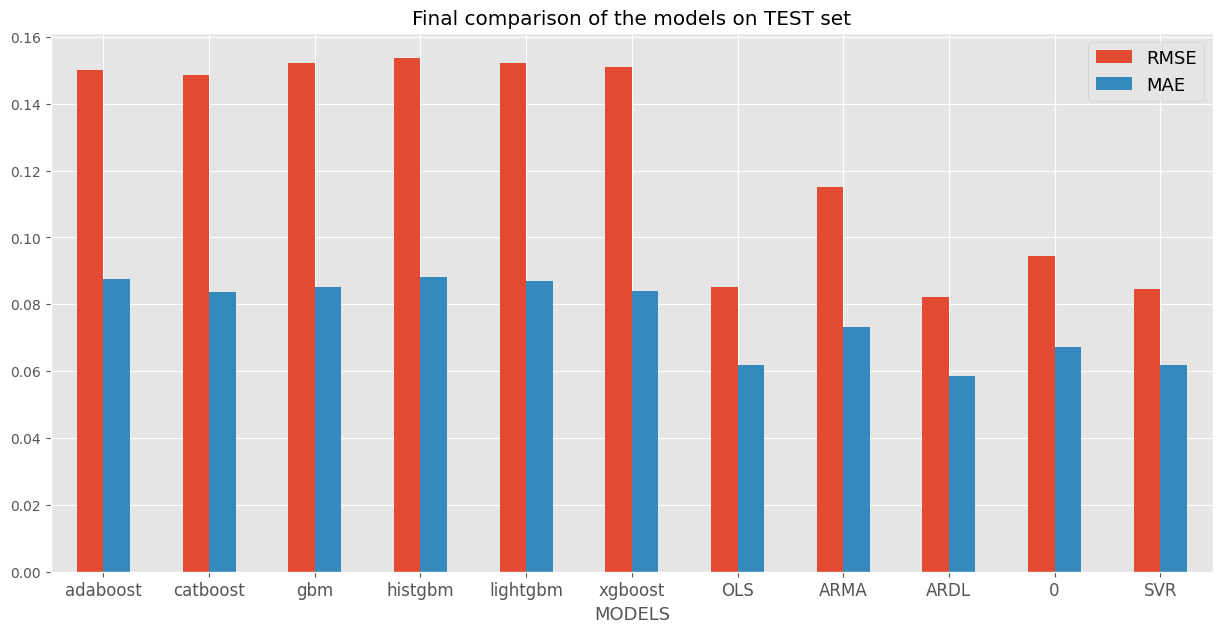

In [74]:
plt.style.use('ggplot')
ax = final_comparison.plot(kind='bar', figsize=(15, 7), title="Final comparison of the models on TEST set")
ax.legend(fontsize=13)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True, ) # labels along the bottom edge are off
ax.set_xticklabels(final_comparison.index, rotation=0, fontsize=12)
ax.set_xlabel("MODELS", fontsize=13)
ax.plot()

And the winner is: **ARDL**, but we see that OLS and SVR were very close.

## Unfortunately, none of the models proved to be better.

#### Final summary

Based on final scores we see that: 
 * naive model ($y_t = y_{t-1}$) have been  beaten by all models
 * ARMA approach without additional exogenous variables was better than naive model
 * OLS approach without additional time-related exogenous variables was better than naive model
 * when we combined both approaches: static exogenous variables + time-related exogenous variables in ARDL model we obtained better model!
 * SVR and KNN are weaker than econometric approaches

**To be honest in most cases in the business environment for sure we will chose ARDL: cheaper - computational time; fully explainable and has less variables!**